In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display
import tensorflow as tf

In [2]:
# Set random seed
np.random.seed(101)
tf.set_random_seed(101)

## Operation Example

#### Dataset

In [3]:
A = np.random.uniform(0,100,(5,5))
B = np.random.uniform(0,100,(5,1))

display(A.shape)
display(B.shape)

(5, 5)

(5, 1)

#### Model

In [4]:
# Placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

# Graph
add_op = a + b
mult_op = a * b

In [5]:
with tf.Session() as sess:
    # Evaluate Add op
    print('Add Operation result: ')
    add_result = sess.run(
        add_op,
        feed_dict={
            a: A,
            b: B})
    print(add_result)
    
    # Evaluate Mul op
    print('\nMul Operation result: ')
    mult_result = sess.run(
        mult_op,
        feed_dict={
            a: A,
            b: B})
    print(mult_result)

Add Operation result: 
[[151.07166  156.49855  102.27921  116.58396  167.95949 ]
 [135.45622   82.76316  141.42784  124.22093   71.06043 ]
 [113.30171   93.09215   76.06819  136.43912  154.42728 ]
 [ 96.71727   81.83804  133.83675  146.38118  101.10579 ]
 [122.72681  105.982925  59.044632  67.9831    72.89292 ]]

Mul Operation result: 
[[5134.644   5674.25     283.12433 1705.4707  6813.8315 ]
 [4341.8125  1598.267   4652.734   3756.8293   988.94635]
 [3207.8113  2038.1029  1052.7742  4546.9805  5588.1157 ]
 [1707.379    614.02527 4434.989   5356.7773  2029.8555 ]
 [3714.0984  2806.6438   262.76764  747.19855 1013.292  ]]


## Perceptron Example
<img src="./img/1.jpg" alt="drawing" width="600"/>


#### Dataset

In [6]:
X = np.random.random([1, 10])

X.shape

(1, 10)

#### Model

In [7]:
n_dense_neurons = 3

# Placeholder: x
X_ph = tf.placeholder(tf.float32, shape=(None, 10))

# Variables: w, b
b = tf.Variable(tf.zeros(shape=[n_dense_neurons]))
W = tf.Variable(tf.random_normal(shape=[10, n_dense_neurons]))

# Graph
xW = tf.matmul(X_ph,W)
z = tf.add(xW,b)
a = tf.sigmoid(z)

In [8]:
# Init Global variables
init = tf.global_variables_initializer()

with tf.Session() as sess:
    # Init Global variables
    sess.run(init)
    
    # Train model
    model = sess.run(
        a,
        feed_dict={
            X_ph: X})

print(model)

[[0.53415525 0.44564104 0.5842615 ]]


## Linear Regression Example

#### Dataset

(1000000,)

(1000000,)

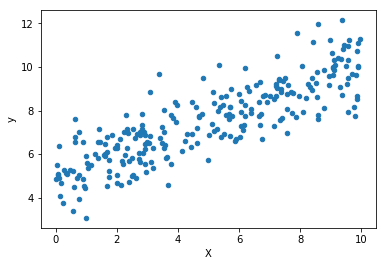

In [9]:
X = np.linspace(0.0,10.0,1000000)
y = (0.5 * X) + 5 + np.random.randn(len(X))

data = pd.concat([
    pd.DataFrame(data=X, columns=['X']),
    pd.DataFrame(data=y, columns=['y'])],axis=1)

display(data \
    .sample(n=250) \
    .plot(kind='scatter',x='X',y='y'))

display(X.shape)
display(y.shape)

#### Model

In [10]:
batch_size = 10

# Variables
W = tf.Variable(0.5)
b = tf.Variable(1.0)

# Placeholders
X_ph = tf.placeholder(tf.float32, shape=[batch_size])
y_ph = tf.placeholder(tf.float32, shape=[batch_size])

# Graph
y_pred = W*X_ph + b

# Loss function
loss = tf.reduce_sum(
    tf.square(y_ph - y_pred))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)

# Train Function
train = optimizer.minimize(loss)

In [11]:
def next_batch(X, y, batch_size=10):
    # Select a random batch index
    rand_idx = np.random.randint(
        len(X),
        size=batch_size)

    return X[rand_idx], y[rand_idx]

In [12]:
# Init global variables
init = tf.global_variables_initializer()

# epochs
epochs = 10001

# MSE
losses = []

with tf.Session() as sess:
    # Init variables
    sess.run(init)

    # Train
    for i in range(epochs):
        # Select a random batch
        X_batch, y_batch = next_batch(X , y, batch_size)

        # train
        sess.run(
            train,
            feed_dict={
                X_ph: X_batch,
                y_ph: y_batch})

        if i%100 == 0:
            # Train mse
            mse = loss.eval(
                feed_dict={
                    X_ph: X_batch,
                    y_ph: y_batch})
            losses.append(mse)

            # PRINT OUT A MESSAGE EVERY 500 STEPS
            if i%500 == 0: 
                print('Epoch: {} - MSE loss = {}'.format(i, mse))


    # Get model
    model = sess.run([W,b])
    display(model)

Epoch: 0 - MSE loss = 29.765052795410156
Epoch: 500 - MSE loss = 12.582509994506836
Epoch: 1000 - MSE loss = 10.763671875
Epoch: 1500 - MSE loss = 13.52699089050293
Epoch: 2000 - MSE loss = 6.366916656494141
Epoch: 2500 - MSE loss = 12.62639331817627
Epoch: 3000 - MSE loss = 7.27824592590332
Epoch: 3500 - MSE loss = 7.377480506896973
Epoch: 4000 - MSE loss = 9.431181907653809
Epoch: 4500 - MSE loss = 4.750251770019531
Epoch: 5000 - MSE loss = 1.9204293489456177
Epoch: 5500 - MSE loss = 16.291837692260742
Epoch: 6000 - MSE loss = 5.199832916259766
Epoch: 6500 - MSE loss = 7.995843410491943
Epoch: 7000 - MSE loss = 11.378549575805664
Epoch: 7500 - MSE loss = 7.803361415863037
Epoch: 8000 - MSE loss = 6.719941139221191
Epoch: 8500 - MSE loss = 7.275454998016357
Epoch: 9000 - MSE loss = 12.311779022216797
Epoch: 9500 - MSE loss = 5.122316360473633
Epoch: 10000 - MSE loss = 7.522307872772217


[0.50191176, 5.0082445]

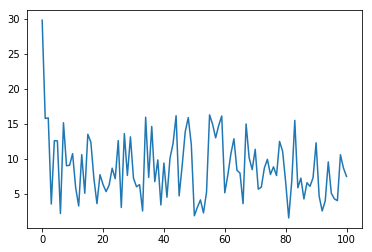

In [13]:
plt.plot(losses)

#### Evaluate

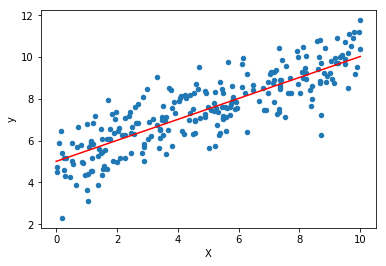

In [14]:
y_pred = X * model[0] + model[1]

data.sample(n=250).plot(kind='scatter',x='X',y='y')
plt.plot(X, y_pred,'r')